In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import math
import random



# Funciones (a usar)

### f(): get names

In [3]:

def get_spp_name(aou: int, db: pd.DataFrame) -> dict:
    """
    Retrieves species information from a species database based on AOU code.
    This function looks up a species in a provided species database DataFrame
    """
    name = db[db['AOU']==aou]
    return {
       'Common Name': name['English_Common_Name'].values[0],
       'Genus': name['Genus'].values[0],
       'Species': name['Species'].values[0],
       'spp': name['Genus'].values[0] + ' ' + name['Species'].values[0]
    }

### f(): Single plot of all routes for single spp


In [4]:
def plot_all_routes_for_species(df, species_aou, species_name=""):
    """
    Plots time series for all routes for a given species from a MultiIndex DataFrame.

    Args:
        df (pd.DataFrame): DataFrame with a MultiIndex of (AOU, routeid)
                           and years as columns.
        species_aou (int): The AOU code of the species to plot.
        species_name (str, optional): The common name for the plot title.
                                      Defaults to "".
    """
    try:
        # 1. Select all data for the given species AOU
        species_data = df.loc[species_aou][np.arange(1992,2024).astype(str)]
    except KeyError:
        print(f"Error: Species AOU {species_aou} not found in the DataFrame index.")
        return

    # Set a title for the plot
    title = f"Abundance Trends for {species_name} (AOU: {species_aou})" if species_name else f"Trends for AOU {species_aou}"

    # 2. Transpose the data so routes are columns and plot
    ax = species_data.T.plot(
        kind='line',
        figsize=(14, 7),
        marker='o',
        alpha=0.7,
        title=title
    )

    # --- Styling and Labels ---
    ax.set_xlabel("Year", fontsize=12)
    ax.set_ylabel("Abundance", fontsize=12)
    ax.legend(title='Route ID')
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()



### f(): Subplots of single species 

In [37]:


def plot_species_routes_in_subplots(
    df: pd.DataFrame, 
    species_aou: int, 
    # species_name: str = "", 
    routes_per_subplot: int = 4
):
    """
    Plots time series for a species' routes in a grid of subplots.

    Each subplot displays a random sample of routes, preventing overcrowding
    in a single plot when a species is present on many routes.

    Args:
        df (pd.DataFrame): DataFrame with a MultiIndex of (AOU, routeid)
                           and years as columns.
        species_aou (int): The AOU code of the species to plot.
        species_name (str, optional): The common name for the main plot title.
        routes_per_subplot (int, optional): The number of routes to plot on
                                            each subplot. Defaults to 4.
    """
    species_name = get_spp_name(species_aou,spps)['Common Name']
    try:
        # 1. Select all data for the given species AOU
        species_data = df.loc[species_aou][np.arange(1992,2024).astype(str)]
        # xy = df.loc[species_aou].loc[['Latitude','Longitude']].drop_duplicates()
        
    except KeyError:
        print(f"Error: Species AOU {species_aou} not found in the DataFrame index.")
        return

    all_routes = species_data.index.tolist()
    num_routes = len(all_routes)

    if num_routes == 0:
        print(f"No routes found for species AOU {species_aou}.")
        return

    # 2. Shuffle routes for random sampling in each subplot
    random.shuffle(all_routes)

    # 3. Determine the grid layout for the subplots
    num_subplots = math.ceil(num_routes / routes_per_subplot)
    # Aim for a squarish grid
    ncols = math.ceil(math.sqrt(num_subplots))
    nrows = math.ceil(num_subplots / ncols)

    # 4. Create the figure and axes grid
    fig, axes = plt.subplots(
        nrows=nrows, 
        ncols=ncols, 
        figsize=(ncols * 5, nrows * 4), 
        sharex=True, 
        sharey=True
    )
    # Flatten the axes array to make it easy to iterate over, regardless of grid shape
    axes = axes.flatten()

    # 5. Iterate and plot on each subplot
    for i in range(num_subplots):
        ax = axes[i]
        
        # Select a chunk of routes for the current subplot
        start_index = i * routes_per_subplot
        end_index = start_index + routes_per_subplot
        routes_chunk = all_routes[start_index:end_index]
        
        chunk_data = species_data.loc[routes_chunk]
        
        # Transpose and plot the chunk
        chunk_data.T.plot(
            ax=ax,
            marker='o',
            alpha=0.8,
            linestyle='-',
            legend=True # Show legend on each subplot
        )
        
        ax.set_title(f"Routes Sample {i+1}", fontsize=10)
        ax.legend(title='Route ID', fontsize='small')
        ax.grid(True, which='both', linestyle='--', linewidth=0.5)

    # 6. Clean up and add master title
    # Hide any unused subplots in the grid
    for i in range(num_subplots, len(axes)):
        axes[i].set_visible(False)

    main_title = f"Abundance Trends for {species_name} (AOU: {species_aou})" if species_name else f"Trends for AOU {species_aou}"
    fig.suptitle(main_title, fontsize=16, fontweight='bold')
    
    # Add shared axis labels
    fig.text(0.5, 0.01, 'Year', ha='center', va='center', fontsize=12)
    fig.text(0.02, 0.5, 'Abundance', ha='center', va='center', rotation='vertical', fontsize=12)

    plt.tight_layout(rect=[0.03, 0.03, 1, 0.95]) # Adjust layout to make room for suptitle
    plt.show()



# Cargar datos

## lista de especeis

In [6]:
spps = pd.read_csv('SpeciesList.csv')

## series de tiempo

In [12]:
d = pd.read_csv('final_routes_data.csv')
d.rename(columns={'Species_y':'Species'}, inplace=True)
# d.info()

# d2 = cast_columns_to_str(d, ['AOU','ruta','Species','Order','English_Common_Name','Genus'])

d2 = d.set_index(['AOU','ruta'])

display(d2)

,,English_Common_Name,Order,Genus,Species,yrs with observations,1966,1967,1968,1969,1970,...,2017,2018,2019,2020,2021,2022,2023,2024,Latitude,Longitude
AOU,ruta,,,,,,,,,,,,,,,,,,,,,
3160,84063903,Mourning Dove,Columbiformes,Zenaida,macroura,28,0,0,0,0,0,...,21,13,28,0,25,22,7,0,34.73006,-76.935921
3870,84063903,Yellow-billed Cuckoo,Cuculiformes,Coccyzus,americanus,28,0,0,0,0,0,...,13,3,17,0,2,17,2,0,34.73006,-76.935921
2890,84063903,Northern Bobwhite,Galliformes,Colinus,virginianus,28,0,0,0,0,0,...,11,13,7,0,4,12,1,0,34.73006,-76.935921
4930,84063903,European Starling,Passeriformes,Sturnus,vulgaris,28,0,0,0,0,0,...,2,9,18,0,6,13,9,0,34.73006,-76.935921
4770,84063903,Blue Jay,Passeriformes,Cyanocitta,cristata,28,0,0,0,0,0,...,4,4,7,0,2,10,3,0,34.73006,-76.935921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5930,84083347,Northern Cardinal,Passeriformes,Cardinalis,cardinalis,26,0,0,0,0,0,...,57,62,71,0,58,60,81,0,30.73087,-93.645921
4090,84083347,Red-bellied Woodpecker,Piciformes,Melanerpes,carolinus,26,0,0,0,0,0,...,11,8,11,0,5,14,23,0,30.73087,-93.645921
4950,84083347,Brown-headed Cowbird,Passeriformes,Molothrus,ater,26,0,0,0,0,0,...,4,7,2,0,2,1,2,0,30.73087,-93.645921


Podemos seleccionar una especie y ruta para plotear la serie de tiempo

In [9]:
# d2.loc[:,'1966':'2024']
min_yr = '1992'
laruta = 84063903
laspp = 3160
nombre = get_spp_name(laspp,spps)['Common Name']
data = d2.loc[(laspp,laruta)].loc[min_yr:'2024']

# x = data.index.astype(int)

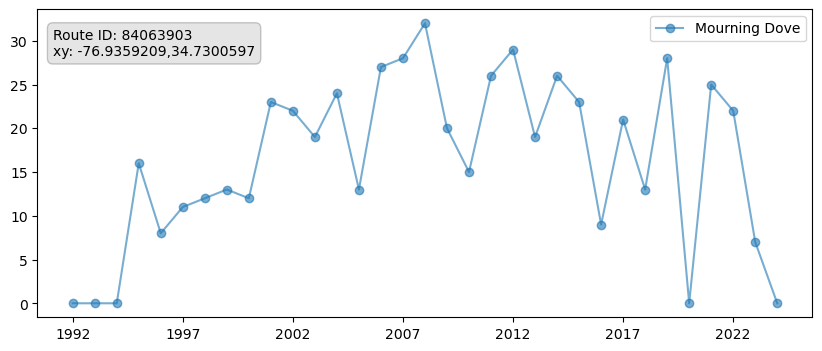

In [10]:

latlon = d2.loc[(laspp,laruta)].loc[['Latitude','Longitude']].drop_duplicates()
ax = data.plot(kind='line',figsize=(10,4),marker = 'o',alpha=.6,label=nombre)
ax.legend()

ax.text(0.02,0.85,
        f'Route ID: {laruta} \nxy: {latlon['Longitude']},{latlon['Latitude']}',
        fontsize=10, bbox=dict(facecolor='grey', alpha=0.2, boxstyle='round,pad=.4'),
        transform = ax.transAxes);


# Ploteamos todas las rutas de una especie

**la lista de especies sirve para seleccionar una especie**

In [40]:
display(d2[['English_Common_Name','Order','Genus','Species']].drop_duplicates())

,,English_Common_Name,Order,Genus,Species
AOU,ruta,,,,
3160,84063903,Mourning Dove,Columbiformes,Zenaida,macroura
3870,84063903,Yellow-billed Cuckoo,Cuculiformes,Coccyzus,americanus
2890,84063903,Northern Bobwhite,Galliformes,Colinus,virginianus
4930,84063903,European Starling,Passeriformes,Sturnus,vulgaris
4770,84063903,Blue Jay,Passeriformes,Cyanocitta,cristata
...,...,...,...,...,...
3210,8408341,Inca Dove,Columbiformes,Columbina,inca
70,84003318,Common Loon,Gaviiformes,Gavia,immer
5275,84003409,unid. Common Redpoll / Hoary Redpoll,Passeriformes,Carduelis,flammea / hornemanni


elejir un AOU (identificador de especie)

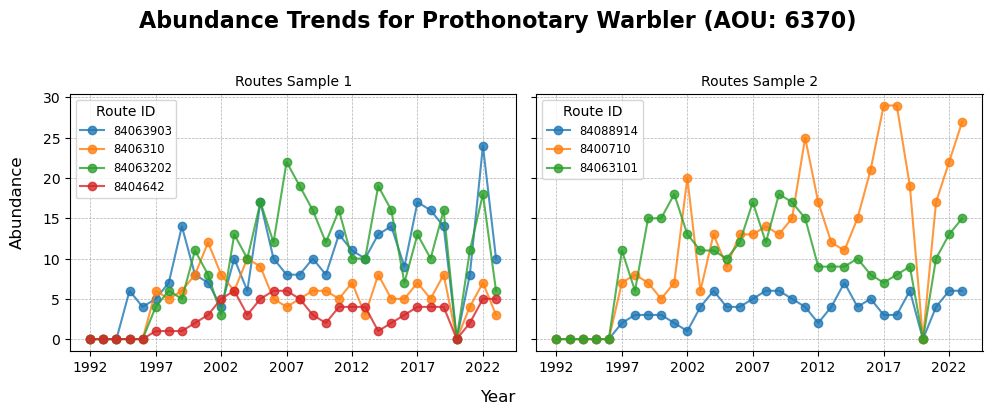

In [41]:
aou = 6370

plot_species_routes_in_subplots(
    df=d2, 
    species_aou=aou, 
    # species_name=get_spp_name(aou,spps),
    #routes_per_subplot=5 # You can change this number
)